### Problem Statement

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

**Dataset link:** [Aerofit_treadmill.csv](https://drive.google.com/file/d/1aK8oa074-F9pByr_E5AukQK463JWrX5S/view)

* **Product Purchased:**	KP281, KP481, or KP781
* **Age:**	In years
* **Gender:**	Male/Female
* **Education:**	In years
* **MaritalStatus:**	Single or partnered
* **Usage:**	The average number of times the customer plans to use the treadmill each week.
* **Income:**	Annual income (in $)
* **Fitness:** Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

* The *KP281* is an entry-level treadmill that sells for USD 1,500.
* The *KP481* is for mid-level runners that sell for USD 1,750.
* The *KP781* treadmill is having advanced features that sell for USD 2,500.

### Basic Stratergy 
The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform **descriptive analytics** to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way **contingency tables** and compute all *conditional and marginal probabilities* along with their insights/impact on the business.

### Import necessary libraries

* **pandas (pd):** Pandas is a powerful data manipulation and analysis library for Python, providing data structures like DataFrames for efficient handling of structured data.
* **numpy (np):** NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
* **seaborn (sns):** Seaborn is a statistical data visualization library built on top of Matplotlib. It simplifies the process of creating attractive and informative statistical graphics.
* **matplotlib.pyplot (plt):** Matplotlib is a 2D plotting library for Python. Pyplot is a collection of functions that make matplotlib work like MATLAB. It provides a convenient interface for creating various types of plots and charts.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 1.Analysing basic metrics

#### 1.1 Read data

Using Pandas Library, we’ll load the CSV file. Named it with data for the dataset.

In [4]:
data = pd.read_csv("aerofit_treadmill.csv")

#### 1.2 Shape of data

It provides the dimensions (number of rows and columns) of the DataFrame,

In [5]:
data.shape

(180, 9)

Our data has 180 rows and 9 features

#### 1.3 check first  and last 5 rows and 9 features

**df.head()** displays the first few rows of a DataFrame, while **df.tail()** shows the last few rows, providing a quick overview of the dataset's structure and content.

In [9]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


#### 1.4 check datatype

In [8]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

No need to change datatypes

#### 1.5 Check duplicate values


In [12]:
data.duplicated().sum()

0

Dataset doesn't hold duplicate entries

#### 1.6 Check null values

df.isna() returns a DataFrame of the same shape as the input, where each element is a boolean indicating whether the corresponding element in the original DataFrame is NaN (missing) or not.

In [13]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### 1.7 5 point summary of numerical features 

df.describe() provides basic statistical information (count, mean, std, min, 25%, 50%, 75%, and max) about the numerical columns in the DataFrame.
Together, they offer a comprehensive view of the DataFrame's structure and content.


In [14]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Insights

* 50 percent individuals who purchased treadmill have age below 33 years
* min age is 18 and maximum age is 50 who purchesd treadmill
* 50 percent individuals who purchesd traidemill have below 16 years education
* The average annual income of individuals is around  between 53k to 54k, who like to purchase treadmill
* The average number of 3 times the customer plans to use the treadmill each week
* 50 percent individuals expects below 94 miles to run/walk each week


#### Info()

df.info() gives a concise summary of the DataFrame including data types and missing values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Basic matrics Insights

* Data have 9 features and 180 entries
* Data doesn't hold any duplicate entries
* Data doesn't have null values
* no need to change datatypes



### 2 Non Graphical Analysis

Non-graphical analysis refers to the examination and interpretation of data without relying on visual representations such as charts or graphs. It involves using descriptive statistics, tables, and summary measures to understand the characteristics of the data 

In [16]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### 2.1 Separating Categorical and numerical features

In [29]:
### Creating categorical dataset
categorical = []
for cols in data.columns:
    if data[cols].dtypes == 'object':
        categorical.append(cols)
        
cat_data = data[categorical]
cat_data.head()

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered


In dataframe "Product","Gender","MaritalStatus" are categorical features

In [38]:
cat_data.shape

(180, 3)

In [30]:
### Creating numerical dataset
numerical = []
for cols in data.columns:
    if data[cols].dtypes != 'object':
        numerical.append(cols)
        
num_data = data[numerical]
num_data.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


Age ,Education ,Usage ,Fitness ,Income ,Miles are numerical features

#### 2.2 Non graphical Analysis on categorical features

In [46]:
### Get unique values in each categorical column
def cat_details(col):
        return pd.Series(col.unique())
    

# Apply the function to the DataFrame along the columns axis
cat_data.apply(cat_details)


,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP481,Female,Partnered
2,KP781,NaN,NaN


#### Insights

* **Product** feature have 3 unique values **KP281, KP481, KP781**
* **Gender** feature have 2 unique values **Male and Female**
* **MaritalStatus** feature have 2 unique values **Single and Partnered**

In [70]:
def print_cat_value_counts(df):
    for col in df.columns:
        print("{} Column have following count of values\n".format(col))
        print(df[col].value_counts(),"\n")
        
print_cat_value_counts(cat_data)


Product Column have following count of values

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Gender Column have following count of values

Male      104
Female     76
Name: Gender, dtype: int64 

MaritalStatus Column have following count of values

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 



#### Insights

* Most of individuals preferred to purchase KP281 treadmill
* Male customers purchased most of the treadmill
* Partnered customers most likely to purchased treadmill than single customers

#### 2.3 Non graphical Analysis on numerical features

In [79]:
### Get Count of unique values in each numerical column
def num_details(col):
        return pd.Series(col.nunique())


In [80]:
num_data.apply(num_details)

,Age,Education,Usage,Fitness,Income,Miles
0,32,8,6,5,62,37


In [169]:
np.around(np.mean(num_data['Age']),2)

28.79

In [96]:
bins = [18, 25, 31, 36, 41, 46, 51]
labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50']

# Add a new column with age buckets
age_range = pd.Series(pd.cut(num_data['Age'], bins=bins, labels=labels, right=False)).value_counts().sort_index()



In [97]:
num_range

18-24    54
25-30    66
31-35    32
36-40    16
41-45     6
46-50     6
Name: Age, dtype: int64

In [102]:
print("Maximum salary is : {} \n Minimum salary is : {}\n".format(num_data['Income'].max(),num_data['Income'].min()))

Maximum salary is : 104581 
 Minimum salary is : 29562



In [105]:
# Define the income bins
income_bins = [28000, 41000, 51000, 61000, 71000, 81000, 91000, 101000]

# Define the labels for the income bins
income_labels = ['28K-41K', '41K-51K', '51K-61K', '61K-71K', '71K-81K', '81K-91K', '91K-101K']

# Create a new column with income buckets
income_bucket = pd.Series(pd.cut(num_data['Income'], bins=income_bins, labels=income_labels, right=False)).value_counts().sort_index()

In [106]:
income_bucket

28K-41K     38
41K-51K     52
51K-61K     51
61K-71K     17
71K-81K      3
81K-91K     10
91K-101K     6
Name: Income, dtype: int64

In [107]:
print("Maximum mile is : {} \n Minimum mile is : {}\n".format(num_data['Miles'].max(),num_data['Miles'].min()))

Maximum mile is : 360 
 Minimum mile is : 21



In [110]:
# Define the mile bins
mile_bins = range(20, 401, 40)  # From 20 to 400 in steps of 40

# Define the labels for the mile bins
mile_labels = [f"{start}-{start + 40}" for start in mile_bins[:-1]]

# Create a new column with mile buckets
mile_bucket = pd.Series(pd.cut(num_data['Miles'], bins=mile_bins, labels=mile_labels, right=False)).value_counts()


In [111]:
mile_bucket

60-100     77
100-140    38
20-60      30
140-180    16
180-220    14
260-300     2
220-260     1
300-340     1
340-380     1
Name: Miles, dtype: int64

In [112]:
num_data.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [114]:
num_data['Education'].value_counts()

16    85
14    55
18    23
13     5
15     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [115]:
num_data['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [116]:
num_data['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

#### Insights
* Customers whose Age between 25-30 years, more likely to purchase treadmill, and average age is 28 years.
* Salary range between 41K-61K of customers have purchased treadmill
* 60-100 miles, the customer expects to walk/run each week.
* Very few customers used treadmill 6-7 times each week
* The customers who have 16 years education like to purchase treadmill more than others
* Self-rated fitness on a 1-to-5 scale,most filtness scale is 3

#### Marginal Probability  

Marginal Probability: Marginal probability refers to the probability of a single event occurring, 

In [117]:
num_data.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


In [120]:
#### Probability of individuals walking/running atleast 140 miles
total_individuals = len(num_data)
miles_above_140 = np.round(len(num_data[num_data['Miles'] > 140]) / total_individuals, 2)
miles_above_140

0.19

In [121]:
#### Probability of customer plans to use the treadmill 3 or less than 3 times each week.
usage_below_3 = np.round(len(num_data[num_data['Usage'] <= 3]) / total_individuals, 2)
usage_below_3

0.57

In [172]:
# Probability of individuals who purchased a treadmill and whose age is between 18 to 35
age_between = np.round(len(num_data[(num_data['Age'] >= 18) & (num_data['Age'] <= 35)]) / total_individuals, 2)
age_between


0.84

In [127]:
cat_data.head()

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered


In [128]:
#### what is Probability that buying treadmill customer is Single
single = np.round(len(cat_data[(cat_data['MaritalStatus'] == 'Single')]) / total_individuals, 2)
single

0.41

In [129]:
#### what is Probability that buying treadmill customer is Female
female = np.round(len(cat_data[(cat_data['Gender'] == 'Female')]) / total_individuals, 2)
female

0.42

In [131]:
####Probability that customer buying entry-level treadmill or mid-level treadmill
entry_mid = np.round(len(cat_data[(cat_data['Product'] == 'KP281') | (cat_data['Product'] == 'KP481')]) / total_individuals, 2)
entry_mid


0.78

#### Insights

* Probability of individuals walking/running atleast 140 miles is 19% and Probability of customer plans to use the treadmill 3 or less than 3 times each week is 57%
* Most of customers who puchased treadmill is age between 25-30 years and Probability of individuals who purchased a treadmill and whose age is between 18 to 35 is 84
* A female customer purchasing treadmill having probability is 42%, whereas probability of buying treadmill customer is Single is 42%

#### Conditional Probability


In [151]:
data.sample(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
69,KP281,38,Female,14,Partnered,2,3,54576,56
38,KP281,26,Female,16,Single,3,3,36384,66
175,KP781,40,Male,21,Single,6,5,83416,200


In [145]:
def compute_probabilities_for_product(product, data):
    print(f"Product: {product}")
    # Filter data for the given product
    product_data = data[data['Product'] == product]
    
    # Construct a contingency table for Gender vs MaritalStatus
    contingency_table = pd.crosstab(product_data['Gender'], product_data['MaritalStatus'])
    print("\nContingency Table (Gender vs MaritalStatus):")
    print(contingency_table)
    
    # Compute conditional probabilities
    conditional_probabilities = np.around(contingency_table.div(contingency_table.sum(axis=1), axis=0), 2)
    print("\nConditional Probabilities (Gender given MaritalStatus):")
    print(conditional_probabilities)
    
    # Compute marginal probabilities
    marginal_probabilities_gender = product_data['Gender'].value_counts(normalize=True)
    marginal_probabilities_marital_status = product_data['MaritalStatus'].value_counts(normalize=True)
    print("\nMarginal Probabilities (Gender and MaritalStatus):")
    print("Gender:")
    print(marginal_probabilities_gender)
    print("\nMaritalStatus:")
    print(marginal_probabilities_marital_status)
    
    print("\n---\n")

In [148]:
compute_probabilities_for_product('KP781', data)


Product: KP781

Contingency Table (Gender vs MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female                 4       3
Male                  19      14

Conditional Probabilities (Gender given MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female              0.57    0.43
Male                0.58    0.42

Marginal Probabilities (Gender and MaritalStatus):
Gender:
Male      0.825
Female    0.175
Name: Gender, dtype: float64

MaritalStatus:
Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64

---



In [149]:
compute_probabilities_for_product('KP481', data)


Product: KP481

Contingency Table (Gender vs MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female                15      14
Male                  21      10

Conditional Probabilities (Gender given MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female              0.52    0.48
Male                0.68    0.32

Marginal Probabilities (Gender and MaritalStatus):
Gender:
Male      0.516667
Female    0.483333
Name: Gender, dtype: float64

MaritalStatus:
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

---



In [150]:
compute_probabilities_for_product('KP281', data)


Product: KP281

Contingency Table (Gender vs MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female                27      13
Male                  21      19

Conditional Probabilities (Gender given MaritalStatus):
MaritalStatus  Partnered  Single
Gender                          
Female              0.68    0.32
Male                0.52    0.48

Marginal Probabilities (Gender and MaritalStatus):
Gender:
Male      0.5
Female    0.5
Name: Gender, dtype: float64

MaritalStatus:
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

---



#### Insights

* For product KP781, Female gender purchasing treadmill having very less probability, but if we check marital status Partnered both male and female approximatly having same treadmill buying probability.

* For product KP481, both male and female gender having same probability to purchase treadmill, and if we check conditional probability, marital status partenerd male gender having more probability around 68% to purchase treadmill

* For product KP281, both male and female gender having same probability to purchase treadmill, and if we check conditional probability, marital status partenerd female gender having more probability around 68% to purchase treadmill


### Graphical Analysis 

#### Univariate Analysis

* **Frequency Distribution:** Calculate the frequency (count) of each category in the categorical feature.
* **Bar Plot:** Visualize the frequency distribution using a bar plot to see the distribution of categories.
* **Percentage Distribution:** Calculate the percentage of each category relative to the total number of observations.
* **Pie Chart:** Visualize the percentage distribution using a pie chart to understand the proportion of each category.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage Distribution')

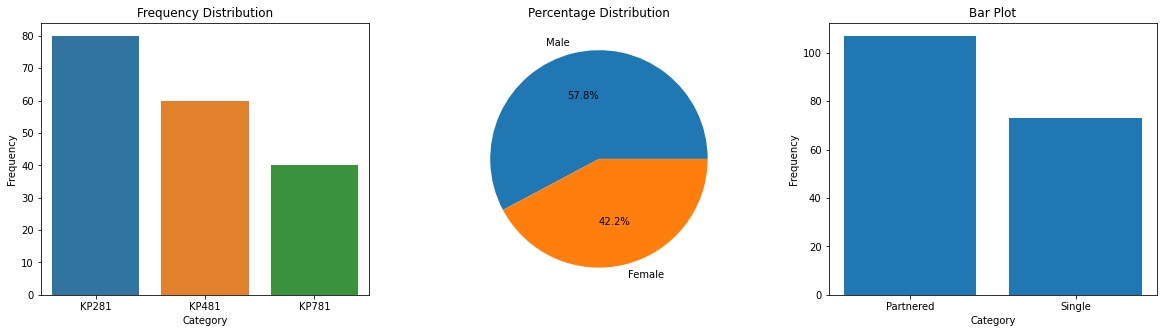

In [167]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Frequency distribution bar plot
sns.countplot(cat_data['Product'],ax=axs[0])
axs[0].set_title('Frequency Distribution')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Frequency')

# Bar plot
plt.bar(cat_data['MaritalStatus'].value_counts().index, cat_data['MaritalStatus'].value_counts().values)
axs[2].set_title('Bar Plot')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Frequency')

# Percentage distribution pie chart
axs[1].pie(cat_data['Gender'].value_counts(),labels=cat_data['Gender'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Percentage Distribution')

#### Insights
* Product KP281 is most purchased
* Purchasing rate of male is higher than female and Partnered marital status purchasing most treadmill.

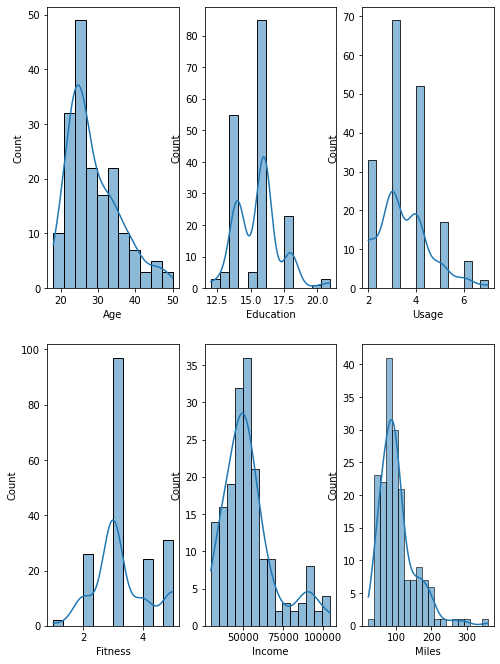

In [177]:
### Understanding distribution of Numerical features
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=num_data, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=num_data, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=num_data, x="Usage", kde=True, ax=axis[0,2])
sns.histplot(data=num_data, x="Fitness", kde=True, ax=axis[1,0])
sns.histplot(data=num_data, x="Income", kde=True, ax=axis[1,1])
sns.histplot(data=num_data, x="Miles", kde=True, ax=axis[1,2])
plt.show()

#### Insights

* Distribution of features Age, Usage, Income ad miles is right skewed.
* Distributiion of Fitness and Education tends to normal distribution, but not exactly normally distributed
* Cutomers age lie between 10-50 and Average age is 28
* High fitness scale is 3
* high salary range is between 41K-61K
* 60-100 miles, the customer expects to walk/run each week
    

#### Bivariate Analysis

To perform bivariate analysis on the given dataset, we can explore the relationships between pairs of variables. Since the dataset consists of both numerical and categorical variables, we'll need to use different methods for each type of variable.

Here's how we can proceed:

**For numerical vs. numerical variables:**

**Scatter plot:** We can create scatter plots to visualize the relationship between two numerical variables. This helps us understand if there's any correlation or pattern between them.

**For categorical vs. categorical variables:**

**Cross-tabulation:** We can create a contingency table to see the frequency distribution of one categorical variable with respect to another categorical variable. This helps us understand if there's any association between the two variables.

**For categorical vs. numerical variables:**

**Box plot or violin plot:** We can create box plots or violin plots to visualize the distribution of a numerical variable for each category of a categorical variable. This helps us understand if there are any differences in the distribution of the numerical variable across different categories of the categorical variable.

#### Numerical and Numerical features

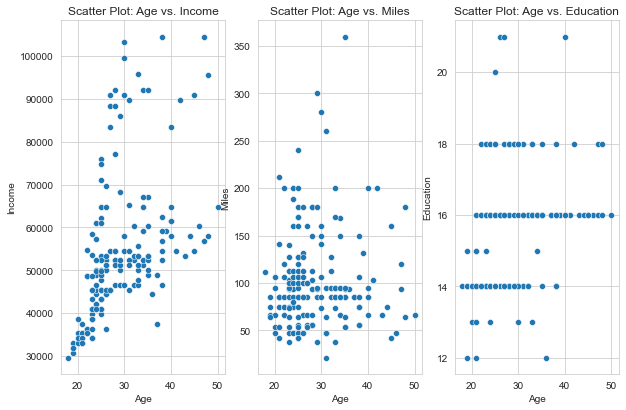

In [200]:
# Scatter plot for Age vs. Income and Age VS Miles
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6.5))
sns.scatterplot(x='Age', y='Income', data=data,ax=axs[0])
axs[0].set_title('Scatter Plot: Age vs. Income')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Income')
sns.scatterplot(x='Age', y='Miles', data=data,ax=axs[1])
axs[1].set_title('Scatter Plot: Age vs. Miles')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Miles')
sns.scatterplot(x='Age', y='Education', data=data,ax=axs[2])
axs[2].set_title('Scatter Plot: Age vs. Education')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Education')
plt.show()

#### Categorical and Numerical Features

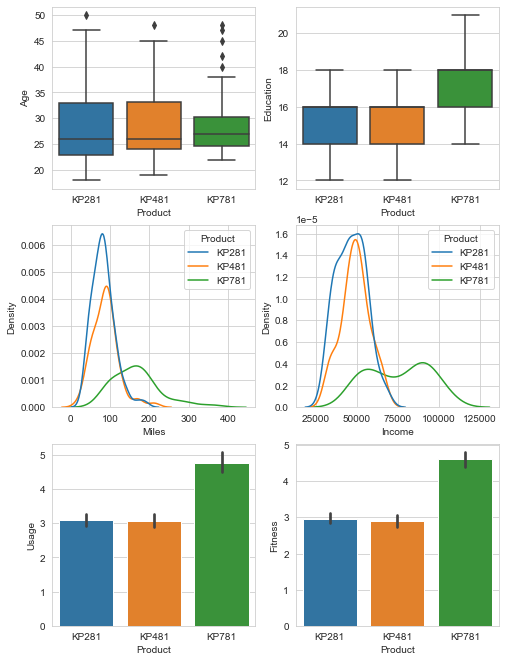

In [210]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=data, x="Product",y = "Age",ax=axis[0,0])
sns.boxplot(data=data, x="Product", y="Education", ax=axis[0,1])
sns.kdeplot(data=data, x="Miles", hue= 'Product', ax=axis[1,0])
sns.kdeplot(data=data, x="Income", hue = 'Product', ax=axis[1,1])
sns.barplot(data=data,  x="Product",y="Usage",estimator = np.mean, ax=axis[2,0])
sns.barplot(data=data,  x="Product",y="Fitness",estimator = np.mean, ax=axis[2,1])
plt.show()

#### Category and Category

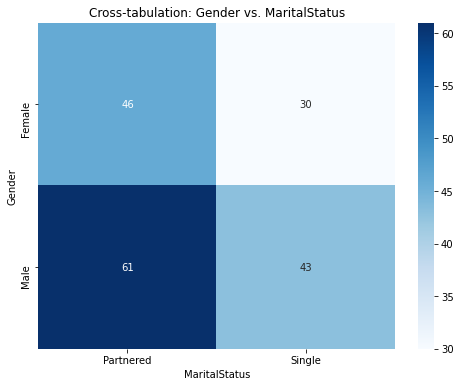

In [182]:
# Cross-tabulation for Gender vs. MaritalStatus
contingency_table = pd.crosstab(data['Gender'], data['MaritalStatus'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Cross-tabulation: Gender vs. MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Gender')
plt.show()

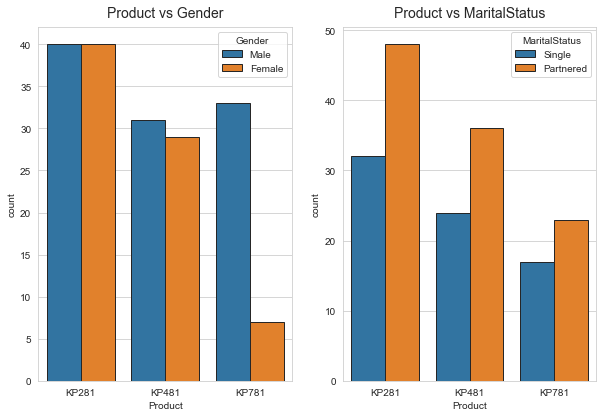

In [194]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=data, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=data, x='Product', hue='MaritalStatus',
edgecolor="0.15", ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

#### Insights

* There is slightly positive relation of Age with income and miles, and Age doesn't have any relation with Education feature
* A customers whose age is between 25-30 are more likely to purchase KP781 treadmill
* A customers having education between 12-18, like to purchase KP281 and KP481, whereas customers having greater than 14 years education like to purchase KP781
* If the customer expects to walk/run less than 120 Miles per week, it is morelikely that the customer will buy KP281 and KP481 product.
* A customers having salary between 25k to 75k, preferred to buy KP281 and KP481 product.
* Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product. and While the other customers are likely to purchasing KP281 or KP481.
* The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
* Both male and female equally like to purchase KP281 product, where as only few number of females are like tp purchase KP871.
* Partnered marital status having more purchase for all the products than single

#### Check correlation

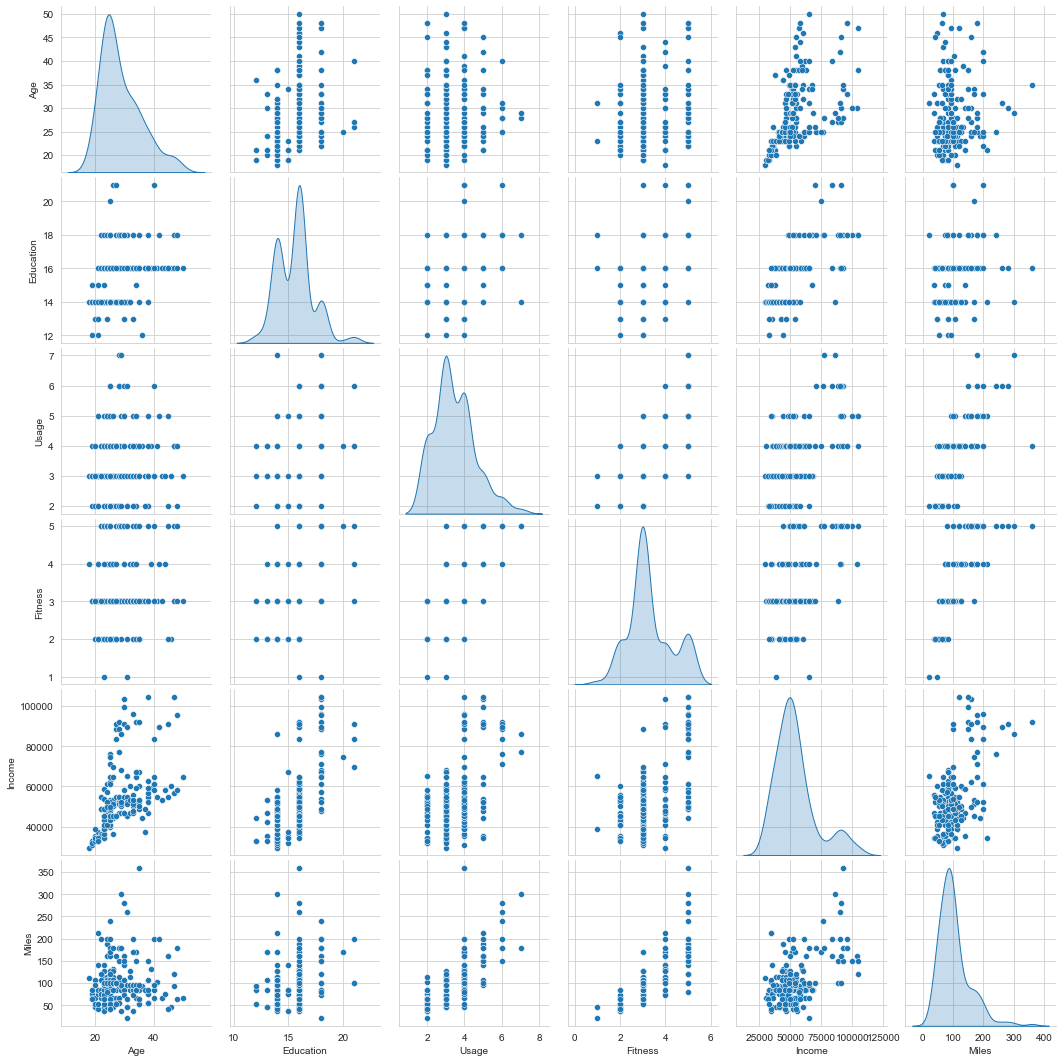

In [215]:
sns.pairplot(data, diag_kind='kde')

plt.show()

#### Insights

* Miles feature have slightly positive correlation with Age and Income
* Income feature have positive correlation with Age and Miles
* Fitness Miles and Usage these features have positive correlation with each other
* Education feature doesn't have any relation with other columns

#### Outlier Detections

In [221]:
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype != 'object':  # Exclude non-numeric columns
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers[column] = len(outlier_data)
    return outliers

# Detect outliers in the dataset
outliers = detect_outliers(data)

# Print the number of outliers for each numerical feature
for column, count in outliers.items():
    print(f"Feature {column} has {count} outliers.")




Feature Age has 5 outliers.
Feature Education has 4 outliers.
Feature Usage has 9 outliers.
Feature Fitness has 2 outliers.
Feature Income has 19 outliers.
Feature Miles has 13 outliers.


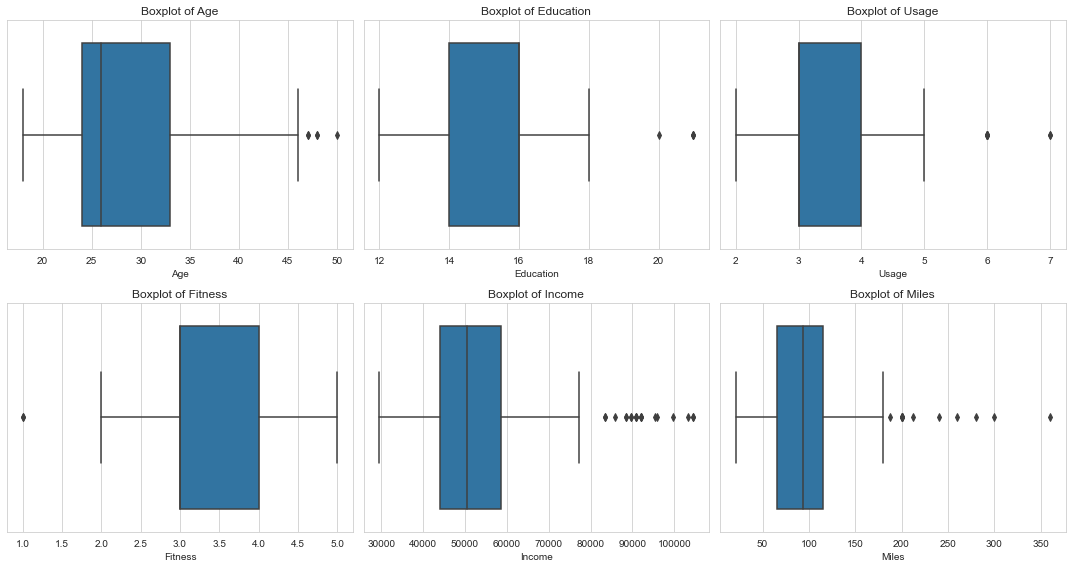

In [218]:
# Define the numerical columns for which you want to detect outliers
numerical_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Insights
* All numerical features having outliers
* Feature Fitness has 2 outliers whereas feature Income has 19 outliers.

####  Business Insights:
While Analysing data, we come to following insights
* Data doesn't hold any duplicate entries and doesn't have null values.
* 50 percent of individuals who purchased treadmills are aged below 33 years and have below 16 years of education
* The average annual income of individuals between 53k and 54k, who like to purchase a treadmill
* Most individuals preferred to purchase the KP281 treadmill
* Male customers purchased most of the treadmill
* Partnered customers are more likely to purchase treadmills than single customers
* Self-rated fitness on a 1-to-5 scale, most fitness scales are 3
* Very few customers used the treadmill 6-7 times each week
* 60-100 miles, the customer expects to walk/run each week.
* The probability of individuals walking/running at least 140 miles is 19% and the Probability of customer plans to use the treadmill 3 or less than 3 times each week is 57%
* Most of the customers who purchased treadmills are aged between 25 and 30 years and the Probability of individuals who purchased a treadmill and who age between 18 and 35 is 84
* A female customer purchasing a treadmill has a probability of 42%, whereas the probability of buying a treadmill customer is Single is 42%
* For product KP781, the Female gender purchasing treadmill has a very low probability, but if we check marital status Partnered both males and females approximately having same treadmill buying probability.
* For product KP481, both males and females have an equal probability of purchasing a treadmill, and if we check conditional probability, marital status partnered male gender having more probability around 68% of purchasing a treadmill
* For product KP281, both males and females have the same probability of purchasing a treadmill, and if we check conditional probability, the marital status partnered female gender has more probability around 68% to purchase a treadmill
* Product KP281 is the most purchased
* There is a slightly positive relation between Age with income and miles, and Age doesn't have any relation to the Education feature
* A customers aged between 25-30 are more likely to purchase a KP781 treadmill
* A customers having education between 12 and 18, like to purchase KP281 and KP481, whereas customers having greater than 14 years of education like to purchase KP781
* If the customer expects to walk/run less than 120 Miles per week, it is more likely that the customer will buy KP281 and KP481 products.
* A customer with having salary between 25k to 75k preferred to buy KP281 and KP481 products.
* Customers who are planning to use the treadmill greater than 4 times a week are more likely to purchase the KP781 product. and While the other customers are likely to purchase KP281 or KP481.
* The more the customer is fit (fitness >= 3), the higher the chances of the customer to purchase the KP781 product.
* Both males and females equally like to purchase KP281 products, whereas only a few females like to purchase KP871.
* Partnered marital status having more purchases for all the products than single
* Fitness Miles and Usage These features have a positive correlation with each other and the Education feature doesn't have any relation with other feature
* All numerical features have outliers and Feature Fitness has 2 outliers whereas Feature Income has 19 outliers.

#### Recommendation
* Very few customers like to purchase KP781 products, looks like a high price and high years of education can be constraints, we can provide some guided videos or books while purchasing KP781 products that will help to reduce education criteria
* As Prices are very high, it will be more helpful if provide some offers like 7 days free guided  training or can provide some discounts 
* Males are more likely to purchase products than females. The majority time females do not like to invest their time in health-related stuff as they are likely to spend time on other work, we can launch some advertisements that will show how women can use a treadmill while doing their work and how the treadmill will go to help their health and daily routine.
* To attract women's attention we can provide free diet plans to females.
* Partnered more likely to purchase treadmills than singles, The Reason could be financial problems or not having interest. So again we can launch some Advertising to single individuals to show how the treadmill helps them 
* We can also provide some referral programs like a single can refer to a single and will get back cashback or some offer, this will help to attract single customers.